Installation

In [1]:
import torch
torch.cuda.is_available()

False

In [2]:
!python --version
!nvcc --version
!pip install nvcc4jupyter
%load_ext nvcc4jupyter

Python 3.10.12
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
Detected platform "Colab". Running its setup...
Source files will be saved in "/tmp/tmpz_xqmh0i".


In [3]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


Creating Tensors

In [4]:
tensor_a = torch.tensor([1,4,1,3])
tensor_b = torch.randn((256,256))

In [5]:
tensor_a

tensor([1, 4, 1, 3])

In [6]:
tensor_b

tensor([[ 1.1599, -1.2394, -0.2656,  ...,  0.9231, -0.4715,  0.3551],
        [ 0.7666,  0.8218, -0.9176,  ..., -0.6531,  0.1983,  0.5141],
        [ 2.4540, -0.3518,  0.6577,  ...,  0.2589,  0.7293, -0.5968],
        ...,
        [ 3.2714, -0.3531,  0.8963,  ...,  0.7290, -0.4853,  0.2214],
        [-0.4873,  0.8046,  0.2317,  ...,  0.4123,  0.0504,  0.9181],
        [-0.2463,  1.0339, -0.7871,  ...,  0.6921, -0.3494, -0.5039]])

In [7]:
print(tensor_b.shape)
print(tensor_b.unsqueeze(0).size())

torch.Size([256, 256])
torch.Size([1, 256, 256])


In [8]:
# Create a 2x3 matrix (2D tensor) with zeros
tensor_c = torch.eye(3)
tensor_c

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [9]:
img = tensor_b.unsqueeze(0).unsqueeze(0).unsqueeze(0).unsqueeze(0)
print(img.shape)

torch.Size([1, 1, 1, 1, 256, 256])


In [10]:
import matplotlib.pyplot as plt

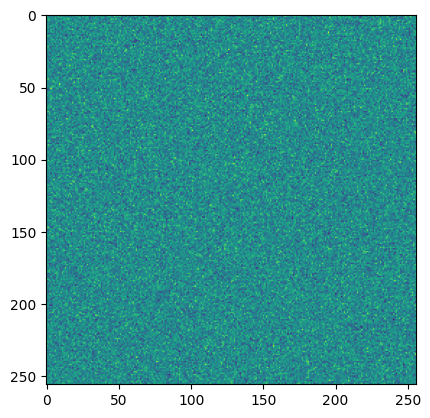

In [11]:
plt.imshow(img.squeeze())

In [12]:
tensor_a = tensor_a.unsqueeze(0)

In [13]:
tensor_a

tensor([[1, 4, 1, 3]])

In [14]:
tensor_a.transpose(0,1)

tensor([[1],
        [4],
        [1],
        [3]])

In [15]:
tensor_a = tensor_a.squeeze(0)
tensor_a

tensor([1, 4, 1, 3])

In [16]:
tensor_a = tensor_a.unsqueeze(0)
tensor_a

tensor([[1, 4, 1, 3]])

In [17]:
matrix_mul = torch.mm(tensor_a.T, tensor_a) # Use unsqueeze to add a dimension to each tensor before performing matrix multiplication.
matrix_mul

tensor([[ 1,  4,  1,  3],
        [ 4, 16,  4, 12],
        [ 1,  4,  1,  3],
        [ 3, 12,  3,  9]])

In [18]:
torch.linalg.det(matrix_mul.float())

tensor(-0.)

In [19]:
torch.linalg.det(matrix_mul.float())

tensor(-0.)

In [20]:

matrix_11 = torch.tensor([30])

In [21]:
matrix_11.squeeze(0).squeeze(0)

tensor(30)

In [22]:
matrix_11.squeeze()

tensor(30)

In [23]:
matrix_11.item()

30

In [24]:
tensor_d = torch.zeros_like(tensor_c)

In [25]:
tensor_d.size() == tensor_c.size()

True

In [26]:
tensor_c == tensor_d

tensor([[False,  True,  True],
        [ True, False,  True],
        [ True,  True, False]])

In [27]:
torch.ones(2,3)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [28]:
tensor_c.shape

torch.Size([3, 3])

In [29]:
tensor_c.shape

torch.Size([3, 3])

In [30]:
tensor_r = torch.rand(3,3,3)

In [31]:
tensor_r

tensor([[[0.7921, 0.1028, 0.1498],
         [0.3455, 0.2221, 0.7806],
         [0.3742, 0.5743, 0.1758]],

        [[0.7034, 0.4588, 0.4503],
         [0.5379, 0.6595, 0.2712],
         [0.2637, 0.9653, 0.4786]],

        [[0.9359, 0.0931, 0.0522],
         [0.8622, 0.0144, 0.3451],
         [0.1675, 0.1760, 0.6601]]])

## Homework

In [32]:
import torch
import sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='white', rc={'figure.figsize':(10,7)})

In [33]:
def sigmoid(x):
  return 1. / (1. + torch.exp(-x))

In [34]:
# Generate the dataset
X, t = sklearn.datasets.make_circles(
    n_samples=100, shuffle=False, factor=0.3, noise=0.05)
T = np.zeros((100, 2)) # Define target matrix
T[t==1, 1] = 1
T[t==0, 0] = 1
# Separate the red and blue samples for plotting
x_red = X[t==0]
x_blue = X[t==1]

print('shape of X: {}'.format(X.shape))
print('shape of T: {}'.format(T.shape))

shape of X: (100, 2)
shape of T: (100, 2)


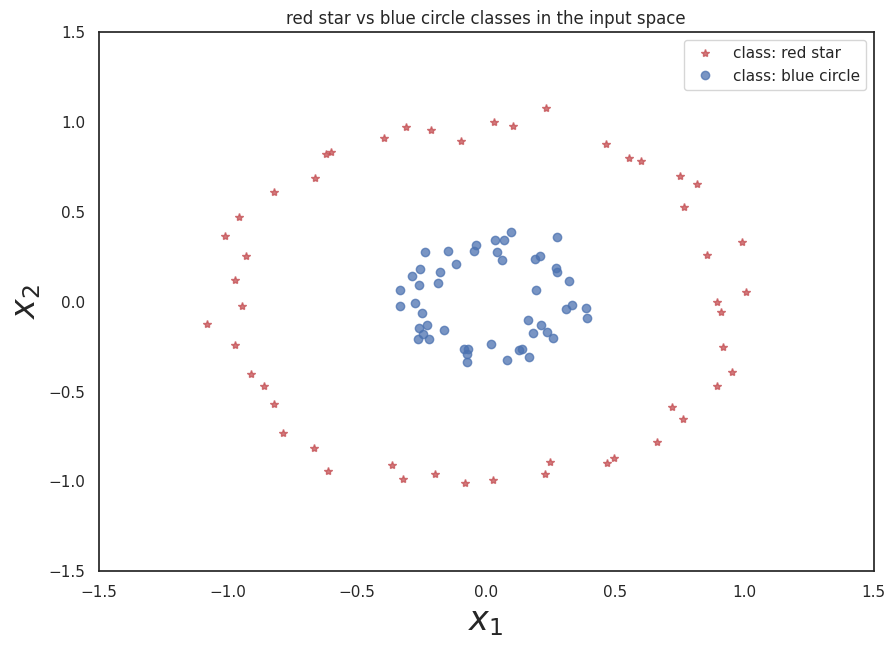

In [35]:
# Plot both classes on the x1, x2 plane
plt.plot(x_red[:,0], x_red[:,1], 'r*',
         label='class: red star', alpha=0.75)
plt.plot(x_blue[:,0], x_blue[:,1], 'bo',
         label='class: blue circle', alpha=0.75)
plt.legend(loc=1)
plt.xlabel('$x_1$', fontsize=24)
plt.ylabel('$x_2$', fontsize=24)
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.title('red star vs blue circle classes in the input space')
plt.show()

In [36]:
class Model(torch.nn.Module):
    def __init__(self, input_size, H1, output_size):
        super().__init__()
        self.linear1 = torch.nn.Linear(in_features = input_size, out_features = H1)
        self.linear2 = torch.nn.Linear(H1, output_size)
    def forward(self, x):
        x1 = torch.nn.functional.tanh(self.linear1(x))
        x2 = self.linear2(x1)
        return sigmoid(x2)
    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0

In [37]:
#defining Linear function
class MyLinear(torch.nn.Module):
    def __init__(self, input_size, output_size):
      super().__init__()
      self.input_size = input_size
      self.output_size = output_size
      self.weight = torch.nn.Parameter(torch.randn(input_size, output_size))
      self.bias = torch.nn.Parameter(torch.randn(output_size))
    def forward(self,x):
      return  torch.mm(x,self.weight)+self.bias

In [38]:
class myModel(torch.nn.Module):
    def __init__(self, input_size, H1, output_size):
        super().__init__()
        self.linear1 = MyLinear(input_size, H1)
        self.linear2 = MyLinear(H1, output_size)
    def forward(self, x):
        x1 = torch.nn.functional.tanh(self.linear1(x))
        x2 = self.linear2(x1)
        return sigmoid(x2)
    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0

In [39]:
model = Model(2, 3, 1)
mymodel = myModel(2, 3, 1)
print(model)
print(mymodel)

Model(
  (linear1): Linear(in_features=2, out_features=3, bias=True)
  (linear2): Linear(in_features=3, out_features=1, bias=True)
)
myModel(
  (linear1): MyLinear()
  (linear2): MyLinear()
)


In [40]:
#print(list(model.parameters()))
print(list(mymodel.parameters()))

[Parameter containing:
tensor([[-0.3572, -2.1397, -0.2546],
        [ 0.6912,  0.9386,  1.6039]], requires_grad=True), Parameter containing:
tensor([-0.4465,  0.9851, -0.6181], requires_grad=True), Parameter containing:
tensor([[0.3310],
        [0.7011],
        [0.4904]], requires_grad=True), Parameter containing:
tensor([0.4775], requires_grad=True)]


In [41]:
criterion = torch.nn.BCELoss()
#criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(mymodel.parameters(), lr = 0.1)

In [42]:
x_data = torch.Tensor(X)
y_data = torch.Tensor(t).unsqueeze(1)

In [43]:
epochs = 1000
losses = []

for i in range(epochs):
    optimizer.zero_grad()
    y_pred = mymodel.forward(x_data)
    loss = criterion(y_pred, y_data.float())
    #print("epoch:", i, "loss", loss.item())
    losses.append(loss.item())
    loss.backward()
    optimizer.step()

Text(0.5, 0, 'epoch')

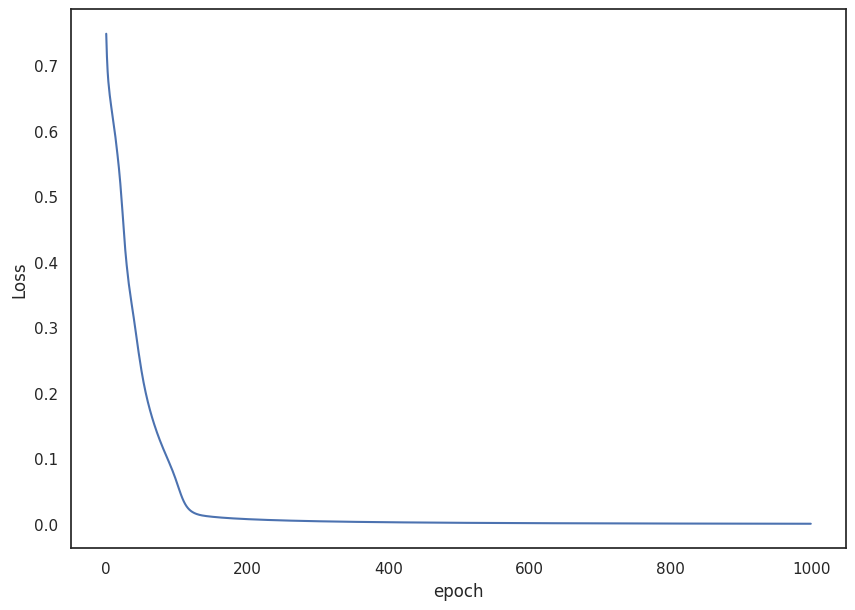

In [44]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

# What happen when the numbes of the layer increases

In [45]:
class Model1(torch.nn.Module):
  #1hidden layer
    def __init__(self, input_size, H1, output_size):
        super().__init__()
        self.linear1 = torch.nn.Linear(in_features = input_size, out_features = H1)
        self.linear2 = torch.nn.Linear(H1, output_size)
    def forward(self, x):
        x1 = torch.nn.functional.tanh(self.linear1(x))
        x2 = self.linear2(x1)
        return sigmoid(x2)
    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0

In [46]:
class Model2(torch.nn.Module):
  #3hidden layers
    def __init__(self, input_size, H1, H2, H3, output_size):
        super().__init__()
        self.linear1 = torch.nn.Linear(in_features = input_size, out_features = H1)
        self.linear2 = torch.nn.Linear(H1, H2)
        self.linear3 = torch.nn.Linear(H2, H3)
        self.linear4 = torch.nn.Linear(H3, output_size)
    def forward(self, x):
        x1 = torch.nn.functional.tanh(self.linear1(x))
        x2 = torch.nn.functional.tanh(self.linear2(x1))
        x3 = torch.nn.functional.tanh(self.linear3(x2))
        x4 = self.linear4(x3)
        return sigmoid(x4)
    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0

In [47]:
class Model3(torch.nn.Module):
  #5hidden layers
    def __init__(self, input_size, H1, H2, H3, H4, H5, output_size):
        super().__init__()
        self.linear1 = torch.nn.Linear(in_features = input_size, out_features = H1)
        self.linear2 = torch.nn.Linear(H1, H2)
        self.linear3 = torch.nn.Linear(H2, H3)
        self.linear4 = torch.nn.Linear(H3, H4)
        self.linear5 = torch.nn.Linear(H4, H5)
        self.linear6 = torch.nn.Linear(H5, output_size)

    def forward(self, x):
        x1 = torch.nn.functional.tanh(self.linear1(x))
        x2 = torch.nn.functional.tanh(self.linear2(x1))
        x3 = torch.nn.functional.tanh(self.linear3(x2))
        x4 = torch.nn.functional.tanh(self.linear4(x3))
        x5 = torch.nn.functional.tanh(self.linear5(x4))
        x6 = torch.nn.functional.tanh(self.linear6(x5))
        return sigmoid(x6)

    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0

In [48]:
model1 = Model1(2, 3, 1)
model2 = Model2(2, 3, 4, 3, 1)
model3 = Model3(2, 3, 4, 4, 4, 3, 1)

In [49]:
criterion = torch.nn.BCELoss()
#criterion = torch.nn.BCEWithLogitsLoss()
optimizer1 = torch.optim.Adam(model1.parameters(), lr = 0.1)
optimizer2 = torch.optim.Adam(model2.parameters(), lr = 0.1)
optimizer3 = torch.optim.Adam(model3.parameters(), lr = 0.1)

In [50]:
x_data = torch.Tensor(X)
y_data = torch.Tensor(t).unsqueeze(1)

In [51]:
epochs = 1000
losses1 = []
losses2 = []
losses3 = []

for i in range(epochs):
    optimizer1.zero_grad()
    optimizer2.zero_grad()
    optimizer3.zero_grad()
    y_pred1 = model1.forward(x_data)
    y_pred2 = model2.forward(x_data)
    y_pred3 = model3.forward(x_data)
    loss1 = criterion(y_pred1, y_data.float())
    loss2 = criterion(y_pred2, y_data.float())
    loss3 = criterion(y_pred3, y_data.float())
    #print("epoch:", i, "loss", loss.item())
    losses1.append(loss1.item())
    losses2.append(loss2.item())
    losses3.append(loss3.item())
    loss1.backward()
    loss2.backward()
    loss3.backward()
    optimizer1.step()
    optimizer2.step()
    optimizer3.step()

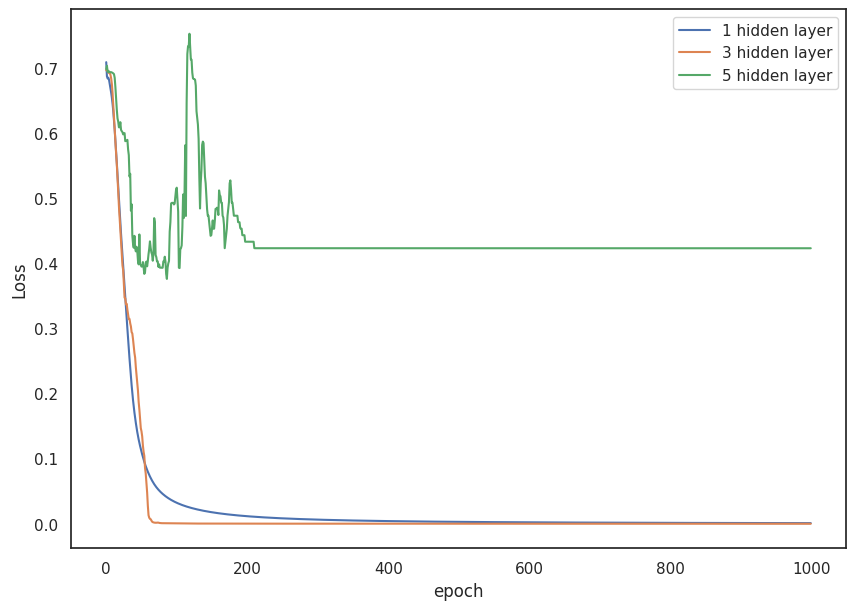

In [52]:
l1,l2,l3 = "1 hidden layer","3 hidden layer","5 hidden layer"
plt.plot(range(epochs), losses1, label=l1)
plt.plot(range(epochs), losses2, label = l2)
plt.plot(range(epochs), losses3, label = l3)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(loc=0)
plt.show()

Try to add more layers. How does it affect trainining loss evolution?

-> The addition of the layers has a huge effect on the loss evolution. Specifically, depending on the number of the layers and the nodes, the rate of the loss reduction changes. The graph on the top shows the loss value of 3 models using a different number of layers. The model using 3 layers has a rapid decrease in the loss value than the model using only 1 layer. However, a model with 5 hidden layers seems to have trouble reducing the value. Therefore, it is important to find the best number of layers that optimize the learning.